# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [181]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [182]:
print(f'The shape of the Tesla Dataframe is {df_tesla.shape[0]} rows and {df_tesla.shape[1]} columns')

The shape of the Tesla Dataframe is 124 rows and 3 columns


In [183]:
print(f'Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [184]:
print(f'Tesla columns: {df_tesla.columns}')
print(f'Bitcoin Search Trend columns: {df_btc_search.columns}')
print(f'Bitcoin Price Trend columns: {df_btc_price.columns}')
print(f'Unemployment Benefits Search vs Unemployment rate columns: {df_unemployment.columns}')

Tesla columns: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
Bitcoin Search Trend columns: Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
Bitcoin Price Trend columns: Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
Unemployment Benefits Search vs Unemployment rate columns: Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


### Unemployment Data

In [185]:
print(f'The shape of the Unemployment Benefits Search vs Unemployment rate Dataframe is '
      '{df_unemployment.shape[0]} rows and {df_unemployment.shape[1]} columns')

The shape of the Unemployment Benefits Search vs Unemployment rate Dataframe is {df_unemployment.shape[0]} rows and {df_unemployment.shape[1]} columns


In [186]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}')


Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [187]:
print(f'The shape of the Bitcoin Search Trend Dataframe is {df_btc_search.shape[0]} rows and {df_btc_search.shape[1]} columns')
print(f'The shape of the Bitcoin Price Trend Dataframe is {df_btc_price.shape[0]} rows and {df_btc_price.shape[1]} columns')

The shape of the Bitcoin Search Trend Dataframe is 73 rows and 2 columns
The shape of the Bitcoin Price Trend Dataframe is 2204 rows and 3 columns


In [188]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [189]:
print(f'largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [190]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [191]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [192]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [193]:
df_btc_price.dropna(inplace=True)
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [194]:
print(f'*** Tesla Table ***\n {df_tesla.dtypes}\n')
print(f'*** Bitcoin Search Trend Table ***\n {df_btc_search.dtypes}\n')
print(f'*** Bitcoin Price Trend  Table ***\n {df_btc_price.dtypes}\n')
print(f'*** Unemployment Benefits Search vs Unemployment rate Table ***\n {df_unemployment.dtypes}')

*** Tesla Table ***
 MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

*** Bitcoin Search Trend Table ***
 MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

*** Bitcoin Price Trend  Table ***
 DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

*** Unemployment Benefits Search vs Unemployment rate Table ***
 MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object


In [195]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla.MONTH)
df_btc_price['DATE'] = pd.to_datetime(df_btc_price.DATE)
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search.MONTH)
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment.MONTH)

In [196]:
# confirming fields are now in Datetime format0
print(f'*** Tesla Table ***\n {df_tesla.dtypes}\n')
print(f'*** Bitcoin Search Trend Table ***\n {df_btc_search.dtypes}\n')
print(f'*** Bitcoin Price Trend  Table ***\n {df_btc_price.dtypes}\n')
print(f'*** Unemployment Benefits Search vs Unemployment rate Table ***\n {df_unemployment.dtypes}')

*** Tesla Table ***
 MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

*** Bitcoin Search Trend Table ***
 MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

*** Bitcoin Price Trend  Table ***
 DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

*** Unemployment Benefits Search vs Unemployment rate Table ***
 MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [197]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [198]:
# This will change the daily data points to one monthly data point based on LAST one of the month
df_btc_price_monthly = df_btc_price.resample('ME', on='DATE').last()

# If we one monthly data point based on the average across the month then we could use this
# df_btc_price_monthly = df_btc_price.resample('ME', on='DATE').mean()

# Data Visualisation

### Notebook Formatting & Style Helpers

In [199]:
# Create locators for ticks on the time axis
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [200]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

<function pandas.plotting._misc.register() -> 'None'>

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

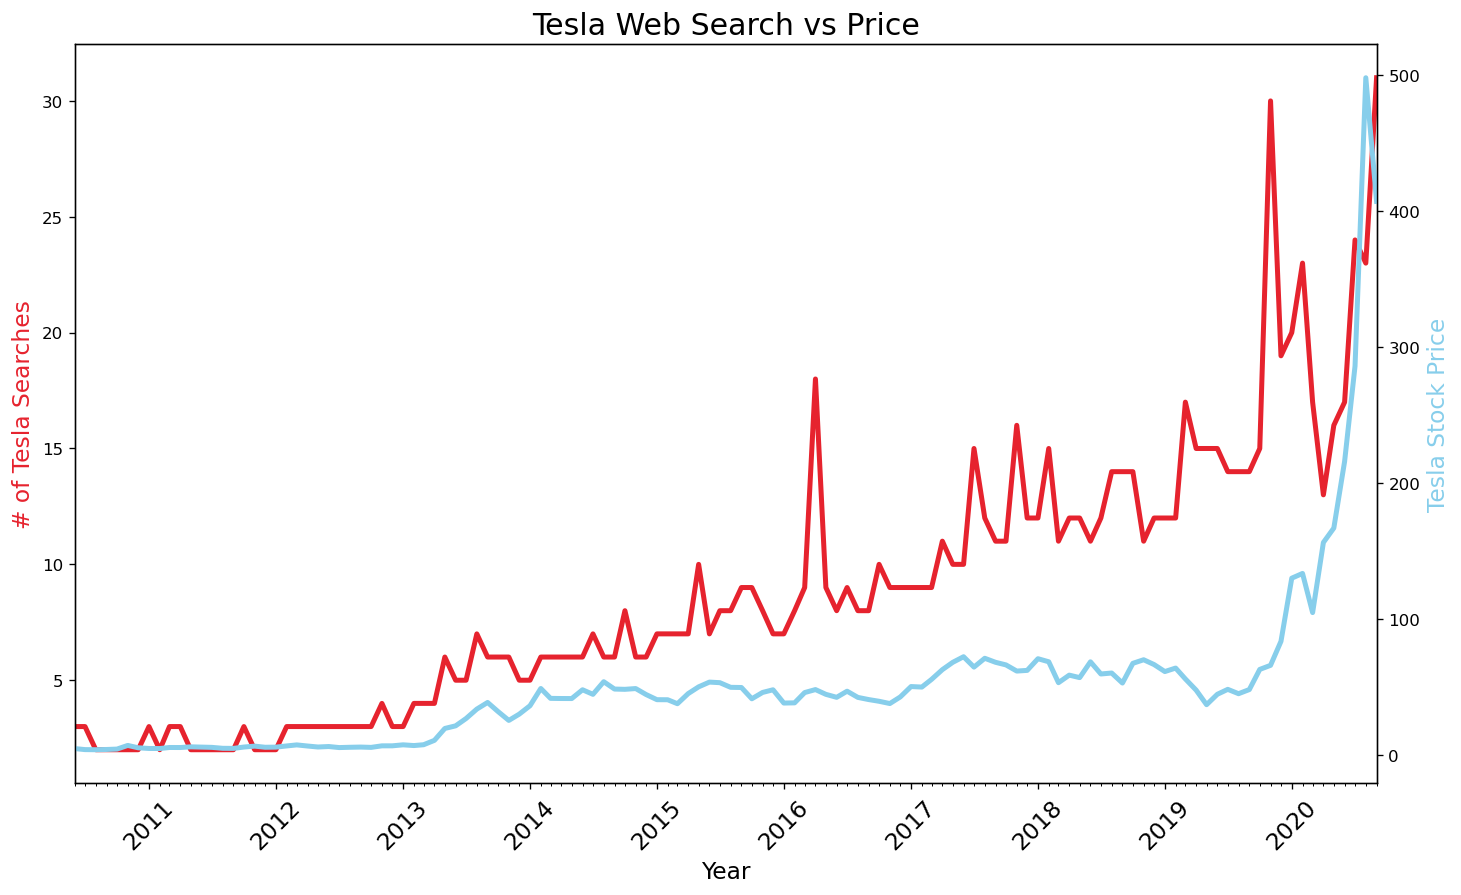

In [201]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#E6232E', linewidth=3)
# color can be defined in hex (#E6232E), by name('skyblue') or color='b' or color="blue"
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='skyblue', linewidth=3)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('# of Tesla Searches', color='#E6232E', fontsize=14)
ax2.set_ylabel('Tesla Stock Price', color='skyblue', fontsize=14)

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# format the ticks on X Axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

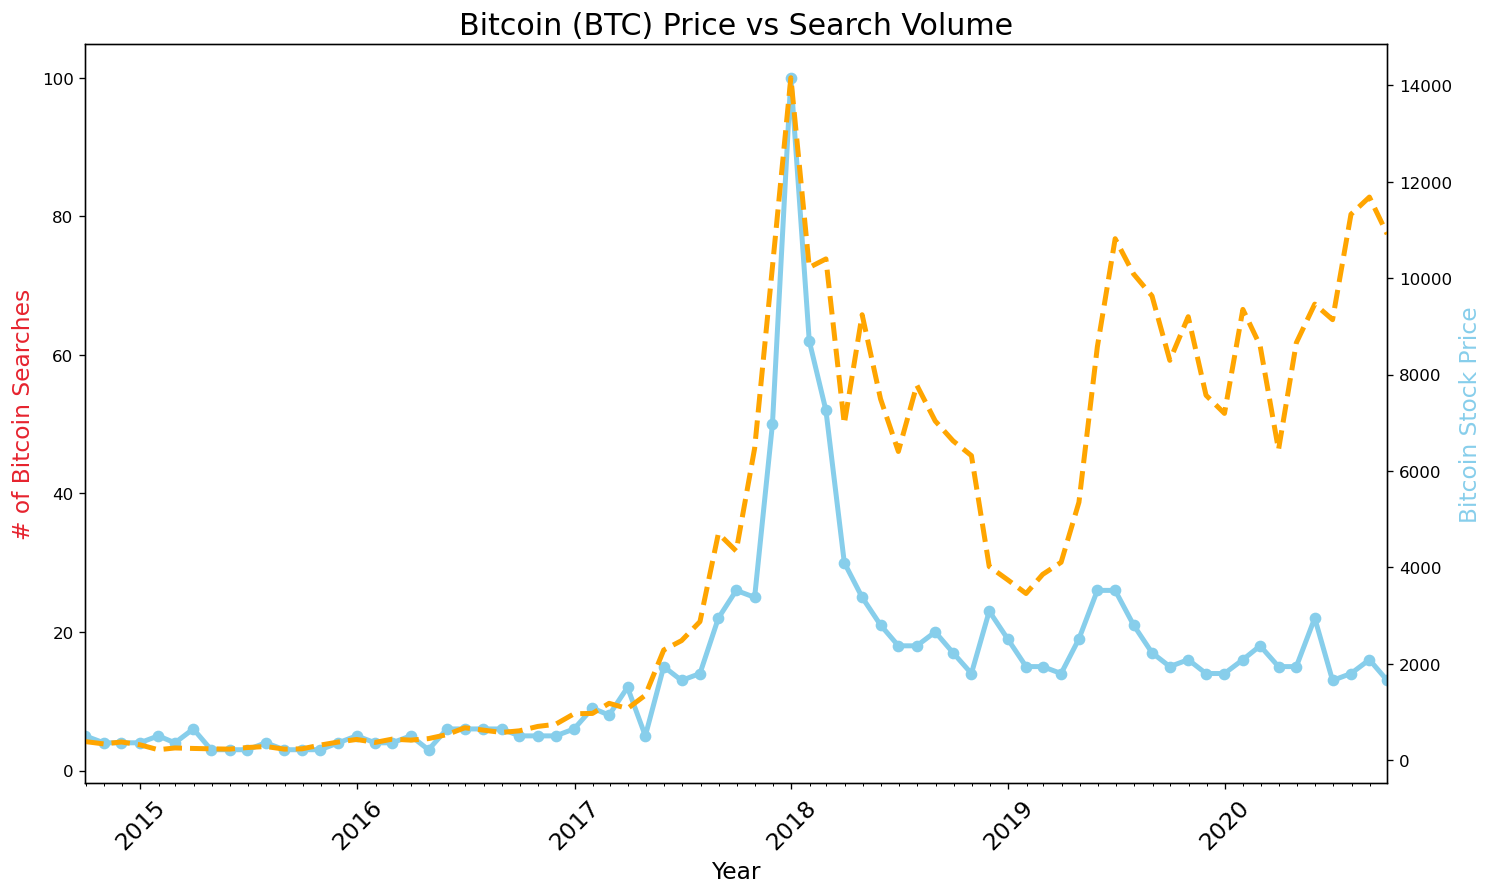

In [202]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Bitcoin (BTC) Price vs Search Volume', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# marker types added to search plotline- see Reference: https://matplotlib.org/3.2.1/api/markers_api.html 
ax1.plot(df_btc_price_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

# color can be defined in hex (#E6232E), by name('skyblue') or color='b' or color="blue"
# linestyles to make the BTC closing price a dashed line added 
# referencew: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html 
ax2.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE, color='orange', linewidth=3, linestyle="dashed")

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('# of Bitcoin Searches', color='#E6232E', fontsize=14)
ax2.set_ylabel('Bitcoin Stock Price', color='skyblue', fontsize=14)

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
ax1.set_xlim([df_btc_price_monthly.index.min(), df_btc_price_monthly.index.max()])

# format the ticks on X Axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

### Unemployment Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

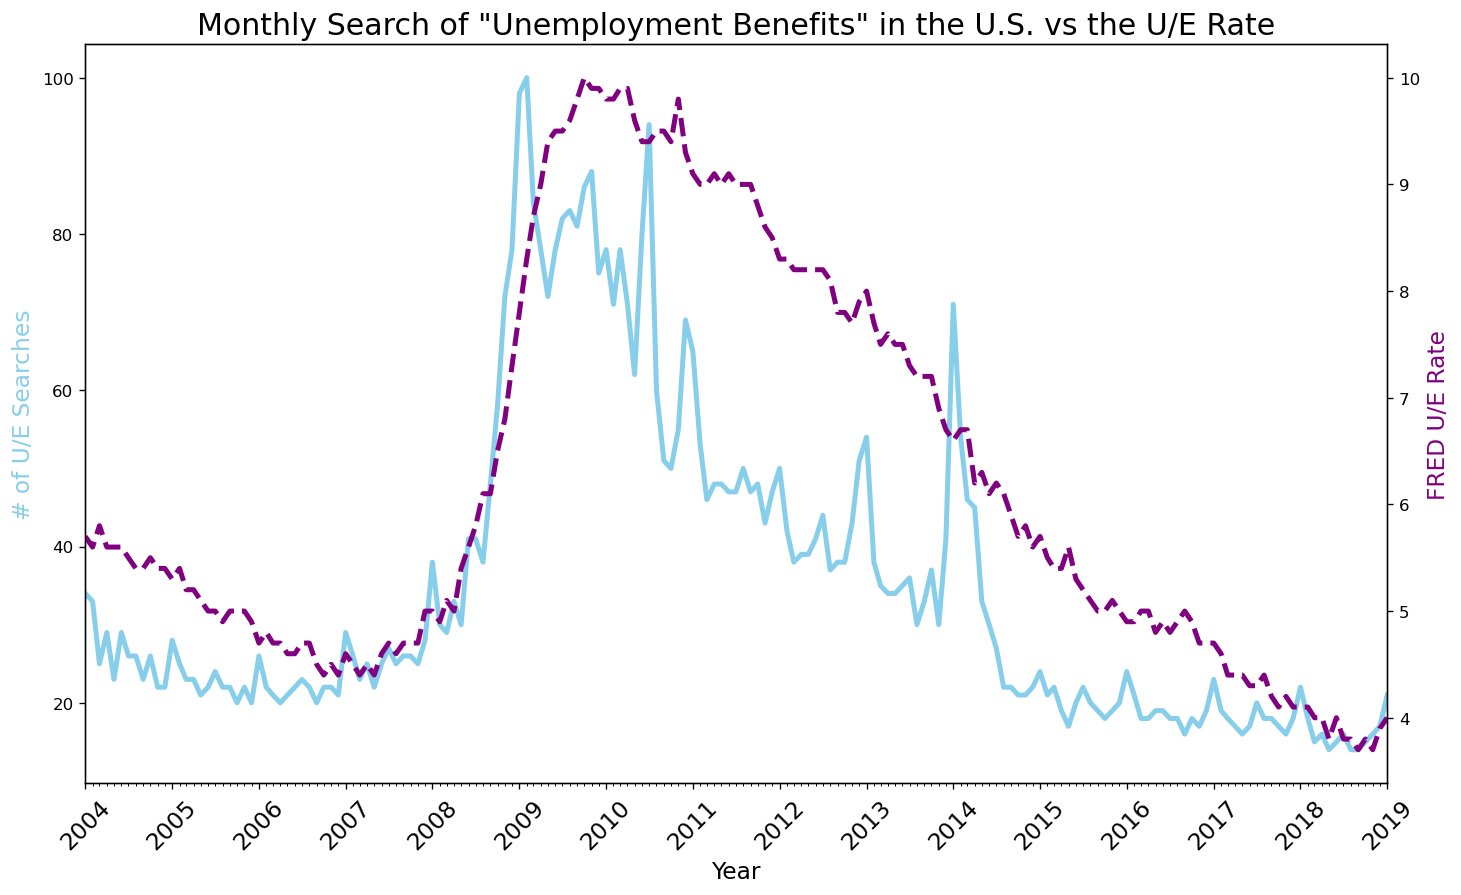

In [203]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# marker types added to search plotline- see Reference: https://matplotlib.org/3.2.1/api/markers_api.html 
ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

# color can be defined in hex (#E6232E), by name('skyblue') or color='b' or color="blue"
# linestyles to make the BTC closing price a dashed line added 
# referencew: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html 
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linewidth=3, linestyle="dashed")

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('# of U/E Searches', color='skyblue', fontsize=14)
ax2.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# format the ticks on X Axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


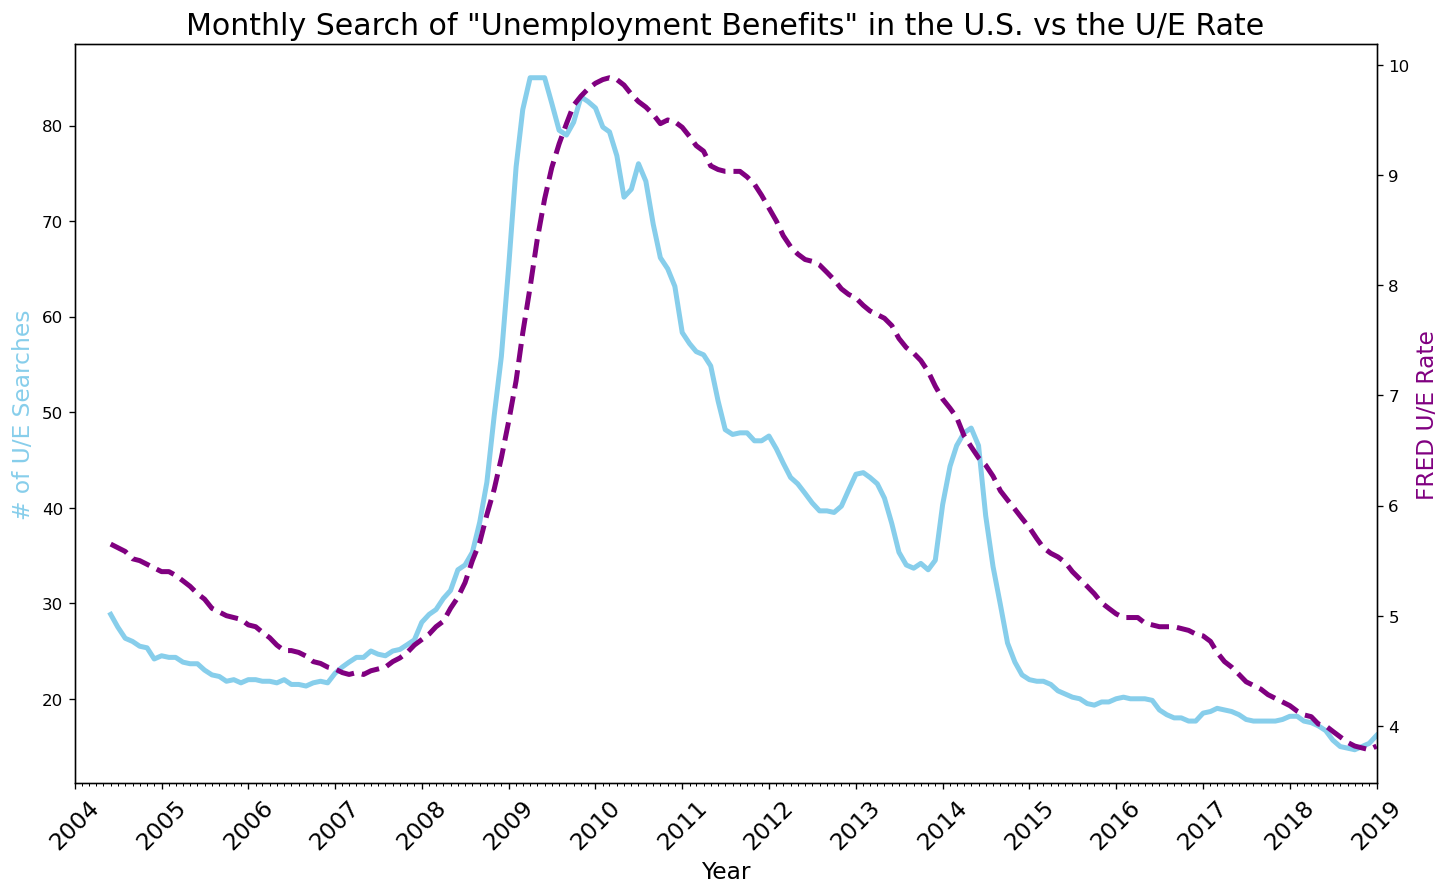

In [214]:
# take existing dataframe and use rolling mean to create a rolling average dataframe
rolled_df_unemployment = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# marker types added to search plotline- see Reference: https://matplotlib.org/3.2.1/api/markers_api.html 
ax1.plot(df_unemployment.MONTH, rolled_df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

# color can be defined in hex (#E6232E), by name('skyblue') or color='b' or color="blue"
# linestyles to make the BTC closing price a dashed line added 
# referencew: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html 
ax2.plot(df_unemployment.MONTH, rolled_df_unemployment.UNRATE, color='purple', linewidth=3, linestyle="dashed")

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('# of U/E Searches', color='skyblue', fontsize=14)
ax2.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)

# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# format the ticks on X Axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Displays chart explicitly
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [219]:
df_ue_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

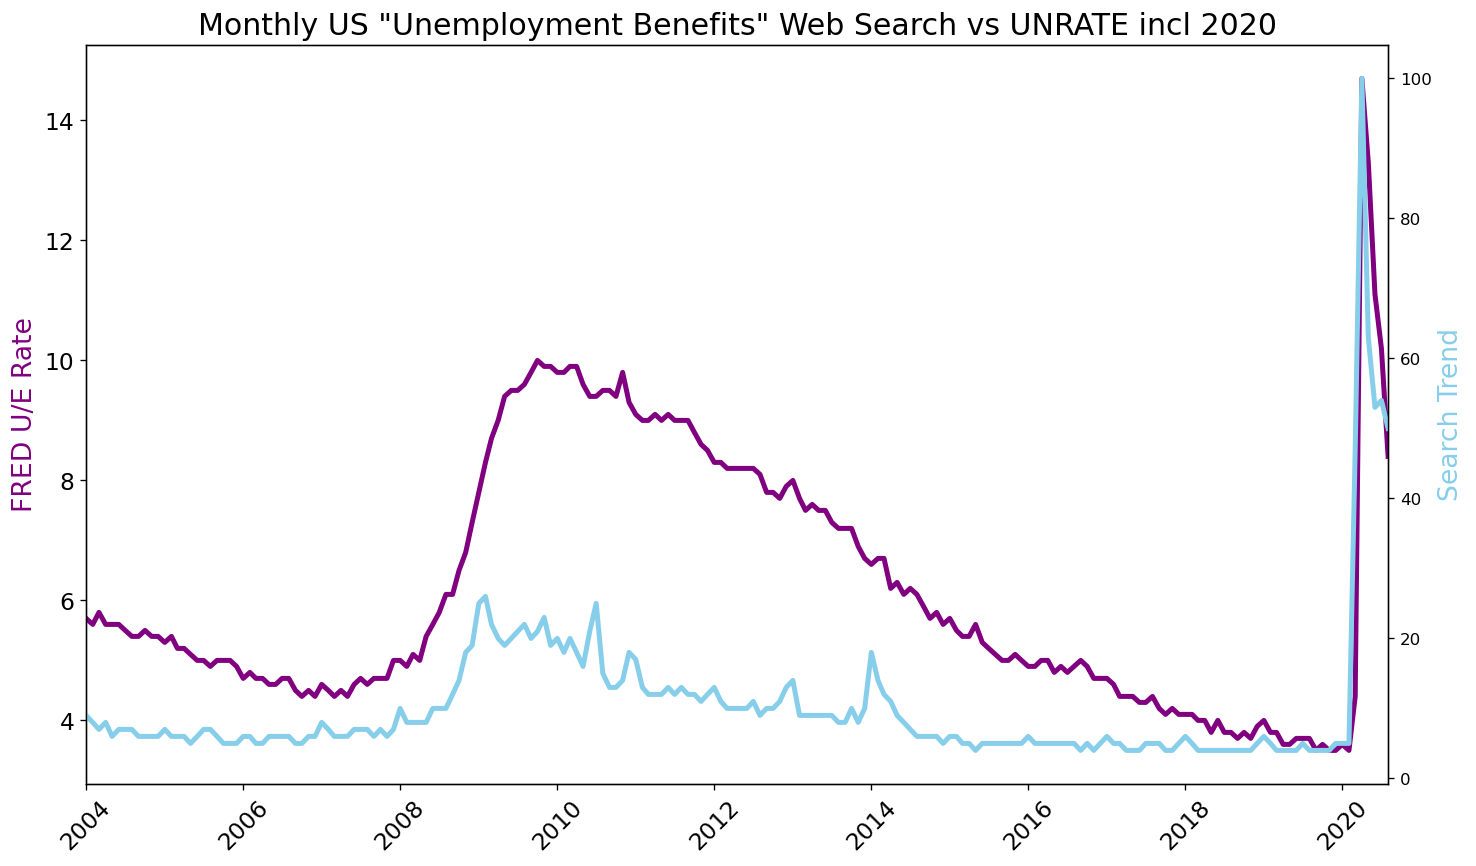

In [220]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

## Learning Points & Summary
In this lesson we looked at how to:

How to use .describe() to quickly see some descriptive statistics at a glance.

How to use .resample() to make a time-series data comparable to another by changing the periodicity.

How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).

How to find the number of NaN values with .isna().values.sum()

How to change the resolution of a chart using the figure's dpi

How to create dashed '--' and dotted '-.' lines using linestyles

How to use different kinds of markers (e.g., 'o' or '^') on charts.

Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).

Using .grid() to help visually identify seasonality in a time series.